# Lab - Neural network
## Shang mingxia P-COM0077/19

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
test = pd.read_csv('mitbih_test.csv')
train= pd.read_csv('mitbih_train.csv')

In [3]:
cols=['x' + str(i+1) for i in range(187)]
cols.append('y')
train.columns=cols
test.columns=cols

In [4]:
train['y'].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: y, dtype: int64

In [5]:
pieNum=train['y'].value_counts()

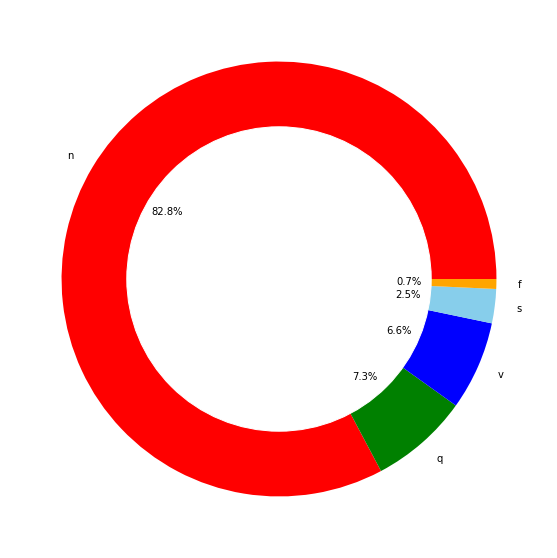

In [6]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(pieNum, labels=['n','q','v','s','f'],colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [7]:
from sklearn.utils import resample
df_1=train[train['y']==1.0]
df_2=train[train['y']==2.0]
df_3=train[train['y']==3.0]
df_4=train[train['y']==4.0]
df_0=(train[train['y']==0.0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

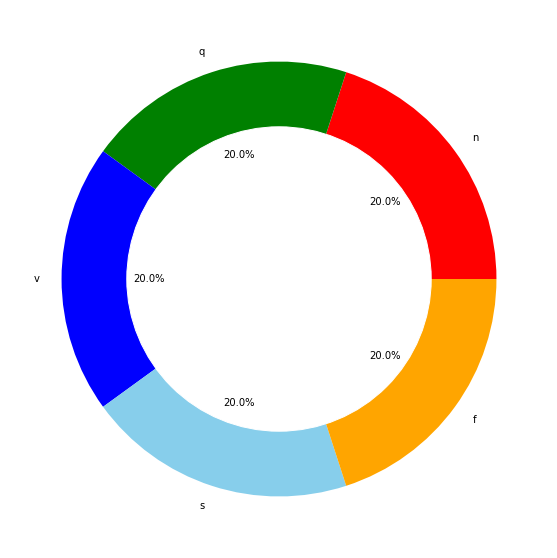

In [8]:
pieNum=train['y'].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(pieNum, labels=['n','q','v','s','f'],colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [9]:
train.shape

(100000, 188)

In [10]:
X_train=train.drop('y',axis=1)
X_test=test.drop('y',axis=1)
y_train=train['y']
y_test=test['y']

In [11]:
from keras.utils import to_categorical 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
y_train = to_categorical(y_train)

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100000, 187)
(100000, 5)
(21891, 187)
(21891,)


In [13]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None,187), name='X') 
y = tf.placeholder(tf.float32, shape=(None,5), name='y')
with tf.name_scope('network'):
    h1 = tf.layers.dense(X, units=32, activation=tf.nn.relu, name='h1') 
    h2 = tf.layers.dense(h1, units=16, activation=tf.nn.relu, name='h2') 
    logits = tf.layers.dense(h2, units=5, name='logits')
    softmax = tf.nn.softmax(logits, name='softmax')

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [21]:
pred = tf.arg_max(softmax, 1)
correct_pred = tf.equal(pred, tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [22]:
with tf.name_scope('loss'):
    loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax, labels=y) 
    loss = tf.reduce_mean(loss)
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001) 
    solver = optimizer.minimize(loss)

In [30]:
with tf.name_scope('train'): 
    saver = tf.train.Saver()
    with tf.Session() as sess: 
        sess.run(tf.global_variables_initializer()) 
        hist_loss = []
        hist_acc = []
        x_batches = np.array_split(X_train, 10) 
        y_batches = np.array_split(y_train, 10)
        for epoch in range(0,2000):
            avg_loss = 0
            avg_acc = 0
            for b in range(0,10):
                batch_x = x_batches[b]
                batch_y = y_batches[b]
                _, loss_val, acc_val = sess.run([solver, loss, accuracy],
                                                feed_dict={X:batch_x, y:batch_y})
                avg_loss = avg_loss + loss_val
                avg_acc = avg_acc + acc_val
                avg_loss = avg_loss / 10
            avg_acc = avg_acc / 10
            hist_loss.append(avg_loss)
            hist_acc.append(avg_acc)
            if epoch % 100== 0:
                print('epoch:', '%04d'%(epoch),'cost:', '{:.4f}'.format(avg_loss), 'acc:', '{:.4f}'.format(avg_acc))
        saver.save(sess, 'model.ckpt')

epoch: 0000 cost: 0.1807 acc: 0.1451
epoch: 0100 cost: 0.1130 acc: 0.7200
epoch: 0200 cost: 0.1119 acc: 0.8050
epoch: 0300 cost: 0.1097 acc: 0.8276
epoch: 0400 cost: 0.1083 acc: 0.8457
epoch: 0500 cost: 0.1074 acc: 0.8551
epoch: 0600 cost: 0.1069 acc: 0.8643
epoch: 0700 cost: 0.1066 acc: 0.8694
epoch: 0800 cost: 0.1063 acc: 0.8733
epoch: 0900 cost: 0.1061 acc: 0.8773
epoch: 1000 cost: 0.1058 acc: 0.8805
epoch: 1100 cost: 0.1056 acc: 0.8835
epoch: 1200 cost: 0.1054 acc: 0.8859
epoch: 1300 cost: 0.1053 acc: 0.8879
epoch: 1400 cost: 0.1051 acc: 0.8905
epoch: 1500 cost: 0.1050 acc: 0.8925
epoch: 1600 cost: 0.1049 acc: 0.8939
epoch: 1700 cost: 0.1048 acc: 0.8958
epoch: 1800 cost: 0.1047 acc: 0.8973
epoch: 1900 cost: 0.1046 acc: 0.8981


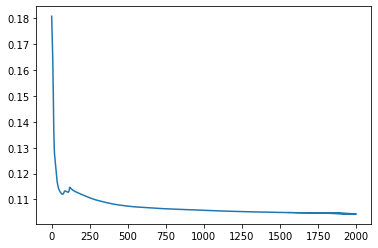

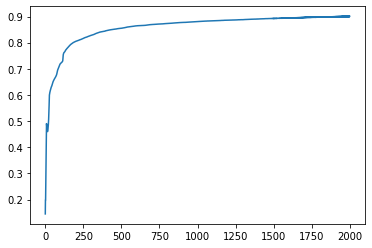

In [31]:
plt.figure()
plt.plot(hist_loss)
plt.figure()
plt.plot(hist_acc)

In [32]:
with tf.name_scope('eval'): 
    with tf.Session() as sess:
        saver = tf.train.Saver()
        saver.restore(sess, 'model.ckpt')
        y_pred = sess.run([softmax], feed_dict={X: X_test})[0]
        y_pred = np.argmax(y_pred, axis=1)

INFO:tensorflow:Restoring parameters from model.ckpt


In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8481567767575716
[[15179   931   518  1040   449]
 [   96   431    20     6     3]
 [   79    28  1282    53     6]
 [   11     3     7   141     0]
 [   40    12    22     0  1534]]
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     18117
         1.0       0.31      0.78      0.44       556
         2.0       0.69      0.89      0.78      1448
         3.0       0.11      0.87      0.20       162
         4.0       0.77      0.95      0.85      1608

    accuracy                           0.85     21891
   macro avg       0.57      0.86      0.64     21891
weighted avg       0.93      0.85      0.88     21891

